# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [48]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model

from scipy import stats

In [3]:
# Your code here.

student_data = pd.DataFrame({"Age": [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], "Tardies": [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

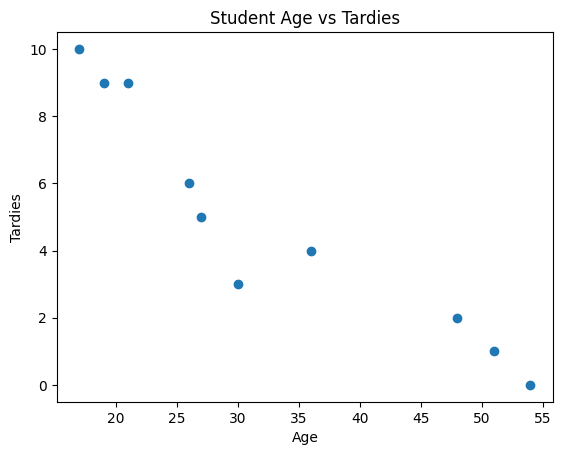

In [5]:
# Your code here.

x = student_data[["Age"]]
y = student_data["Tardies"]

plt.title("Student Age vs Tardies")
plt.xlabel("Age")
plt.ylabel("Tardies")

plt.scatter(x, y)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here.

# It appears that as students age they tend to be more puntual, having less tardies

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [9]:
# Your response here.
#correlation:
student_data_corr = student_data.corr()
print(student_data_corr)
# The correlation is arount -0.94, meaning that there is a negative linear relationship between age and tardies.

#covariance:
student_data_cov = student_data.cov()
print(student_data_cov)
# The covariance is around -45.56, proving the negative nature of the linear relationship between the variables


              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000
                Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [12]:
# Your response here.

# Linear Regression
model = linear_model.LinearRegression()
result = model.fit(x, y)

Plot your regression model on your scatter plot.

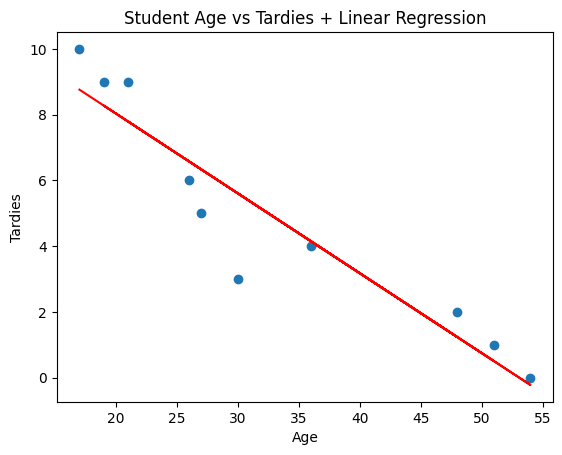

0.8820265558250109


In [17]:
# Your code here.

regression_line = result.intercept_ + result.coef_[0] * x

plt.title("Student Age vs Tardies + Linear Regression")
plt.xlabel("Age")
plt.ylabel("Tardies")

plt.plot(x, regression_line, c = "r")
plt.scatter(x, y)
plt.show()

print(model.score(x, y))

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [18]:
# Your response here. 

# From the results of both the graphic with the linear regression and the model, we can conclude that the correlation between the values is high. Meaning that Age is a good predictor for Tardiness.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [19]:
# Import any libraries you may need & the data

vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [21]:
# Your response here. 

variables = ["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"]
vehicles_subset = vehicles[variables]

correlations = vehicles_subset.corr()

print(correlations)

                             Year  Cylinders  Fuel Barrels/Year  Combined MPG   
Year                     1.000000   0.082469          -0.221084      0.204751  \
Cylinders                0.082469   1.000000           0.739517     -0.698648   
Fuel Barrels/Year       -0.221084   0.739517           1.000000     -0.909743   
Combined MPG             0.204751  -0.698648          -0.909743      1.000000   
Fuel Cost/Year          -0.091913   0.778153           0.916208     -0.875185   
CO2 Emission Grams/Mile -0.222300   0.752393           0.986189     -0.926229   

                         Fuel Cost/Year  CO2 Emission Grams/Mile  
Year                          -0.091913                -0.222300  
Cylinders                      0.778153                 0.752393  
Fuel Barrels/Year              0.916208                 0.986189  
Combined MPG                  -0.875185                -0.926229  
Fuel Cost/Year                 1.000000                 0.930865  
CO2 Emission Grams/Mile       

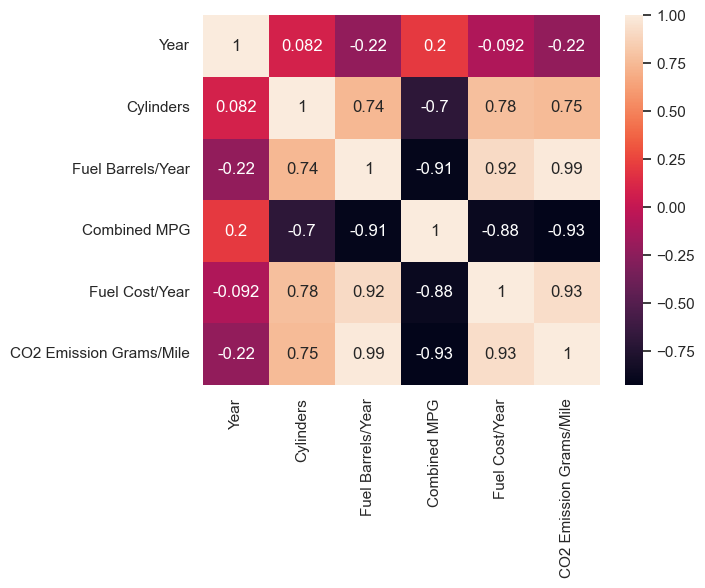

In [24]:
# Let's plot this

sns.heatmap(correlations, annot=True)

plt.show()

In [25]:
# From the heatmap, we can see that Fuel Barrels/Year has the strongest positive correlation with CO2 Emission Grams/Mile, while Combined MPG has the strongest negative correlation. Year has a weak negative correlation, while Cylinders and Fuel Cost/Year have moderate positive correlations.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [31]:
# Your response here. 

x = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y = vehicles["CO2 Emission Grams/Mile"]

# Linear Regression
model = linear_model.LinearRegression()
result = model.fit(x, y)
model.score(x, y)

0.9808734920269122

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [32]:
# Your response here. 

print("Model coefficients:", model.coef_)
print("R^2:", model.score(x, y))

Model coefficients: [-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]
R^2: 0.9808734920269122


In [40]:
# putting it into a DataFrame

coef_df = pd.DataFrame({"Variable": x.columns, "Coefficient": model.coef_})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

print(coef_df)

            Variable  Coefficient
2  Fuel Barrels/Year    19.052925
1          Cylinders     1.878800
4     Fuel Cost/Year     0.032309
0               Year    -0.320617
3       Combined MPG    -3.040399


In [41]:
# Fuel Barrels/Year have the highest coefficient, followed by Cylinders and Fuel Cost/Year

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [43]:
# Your code here.

data = {"X": [1, 3, 4, 6, 8, 9, 11, 14], "Y": [1, 2, 4, 4, 5, 7, 8, 13]}
df = pd.DataFrame(data)
df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

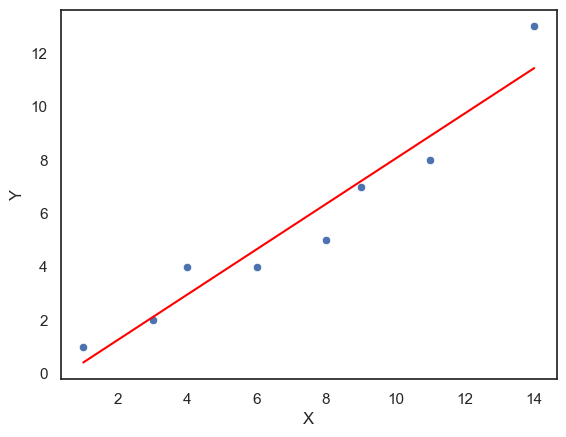

In [56]:
# Your code here.

sns.scatterplot(data=df, x="X", y="Y")

slope, intercept, r_value, p_value, std_err = stats.linregress(df["X"], df["Y"])
line = slope * df["X"] + intercept
plt.plot(df["X"], line, color="red")

plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [51]:
# Your response here. 
'''
The scatter plot suggests a positive linear relationship between the number of people invited and the number of people attending the party.
As the number of people invited increases, there is a tendency for more people to attend the party.
'''

'\nThe scatter plot suggests a positive linear relationship between the number of people invited and the number of people attending the party.\nAs the number of people invited increases, there is a tendency for more people to attend the party.\n'

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [54]:
# Your response here. 

# It seems that the point (14, 13) might be an outlier

In [64]:
people_df = pd.DataFrame({"invited": [1, 3, 4, 6, 8, 9, 11], "attended": [1, 2, 4, 4, 5, 7, 8]})

x = people_df[["invited"]]
y = people_df["attended"]

model = linear_model.LinearRegression()
result = model.fit(x, y)

regression_line = result.intercept_ + result.coef_[0] * x

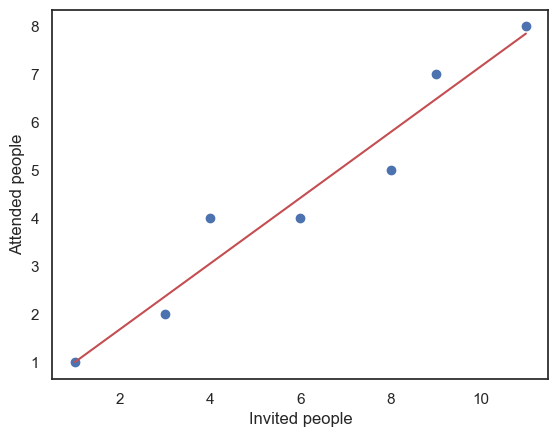

0.9433811802232854


In [66]:
# plot it

plt.plot(x, regression_line, c = "r")
plt.scatter(x, y)

plt.xlabel("Invited people")
plt.ylabel("Attended people")

plt.show()

print(model.score(x, y))

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [67]:
# Your response here. 

# After removing the outlier, the slope of the regression line incresed. This means that now there's a stronger positive relationship between invited people and people who attend.